$$ \huge{\text{Quiz 4}}$$


# Pipeline, PCA, MLP, Gridseach CV

<font size =4>  Here we will create a model for the wine data set from [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) Due to time we will <font color=red> not Train-Test split the data</font>.    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
X=data.data
y=data.target
SS=StandardScaler()
XS=SS.fit_transform(X)
XS.shape

(178, 13)

<font size=4 color =brown>  I scaled the data for you. Use the scaled version XS in your pipeline.  How many features are there in XS? 

<strong>There are 13 features in the pipeline. 

<font size=4 color=blue> Let's do a pipeline and grid search Cv for the wine data set with an MLP Classifier. Start the Pipeline with a PCA with n_components=2  and cv=5.  Use the parameters below for the MLP.

    activation: "logistic","tanh","relu"
    hidden_layer_sizes":(16,16,16),(32,32)


<font size=4 color =brown>  How many models are we running?  How may features will be in the Feature set after we apply PCA?

<strong> 6 models and 2 features 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [4]:
pipe = Pipeline(steps=[
    ("pca", PCA(n_components=2, random_state=42)),    
    ("mlp", MLPClassifier(max_iter=1000))
])

In [5]:
param_grid = [{
        "mlp__hidden_layer_sizes":[(16,16,16),(32,32)],
        "mlp__activation":['logistic','tanh', 'relu']
        }]

In [6]:
grid_search = GridSearchCV(pipe, param_grid, cv=5,return_train_score=True,scoring='accuracy')
grid_search.fit(XS, y)

print("Best Model",grid_search.best_params_)
print("Best Score", grid_search.best_score_)

Best Model {'mlp__activation': 'logistic', 'mlp__hidden_layer_sizes': (32, 32)}
Best Score 0.9663492063492063


In [7]:
DF=pd.DataFrame(grid_search.cv_results_)
DF=DF.sort_values(by=['rank_test_score'])
Summary=DF[[ "param_mlp__hidden_layer_sizes",
            "param_mlp__activation","mean_test_score","rank_test_score"]]
Summary

,param_mlp__hidden_layer_sizes,param_mlp__activation,mean_test_score,rank_test_score
1,"(32, 32)",logistic,0.966349,1
2,"(16, 16, 16)",tanh,0.966349,1
3,"(32, 32)",tanh,0.966349,1
4,"(16, 16, 16)",relu,0.960794,4
5,"(32, 32)",relu,0.960635,5
0,"(16, 16, 16)",logistic,0.943651,6


<font size=4 color=blue> Let's look the results in a data frame.  Subset the data frame so we see less of the output.

<font Size=4 color=brown>  Do you think the mode gives a good result?

<strong> Yes. I think that the model gives good results. based on the chart, it appears that there is not real pattern and the model performs consistently across all combinations, relu performs slightly lower than the other two models, but only by like .06%.  

# Closer Look

<font size=4>  In the image below I performed the PCA to the scaled data and plotted it.  Look at the image and answer the question below.

In [48]:
from sklearn.decomposition  import PCA
pca=PCA(n_components=2)
X_r=pca.fit_transform(XS)
XS.shape,X_r.shape

((178, 13), (178, 2))

<Figure size 800x600 with 0 Axes>

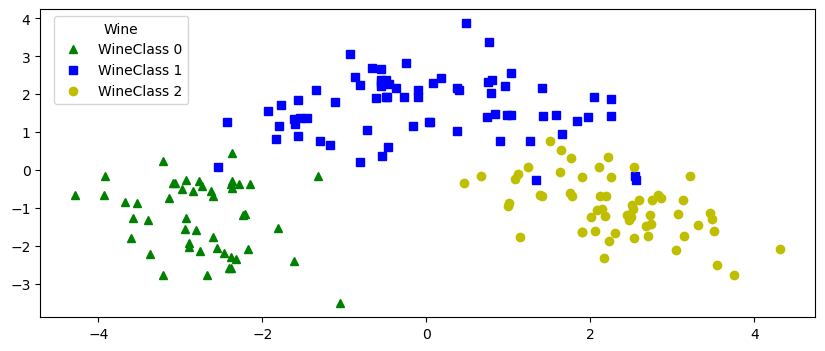

<Figure size 800x600 with 0 Axes>

In [49]:
plt.figure(figsize=(10, 4))
plt.plot(X_r[y==2, 0], X_r[y==2, 1], "g^", label="WineClass 0")
plt.plot(X_r[y==1, 0], X_r[y==1, 1], "bs", label="WineClass 1")
plt.plot(X_r[y==0, 0], X_r[y==0, 1], "yo", label="WineClass 2")
plt.legend(title='Wine', bbox_to_anchor=(.2, 1))
plt.figure(figsize=(8,6))

<font color= brown size=4>  The model performed well even though we greatly reuced the number of features in the feature set with PCA.  Can you explain why form the plot?  

<strong>Because the data set is so small, by using PCA the noisy data is being eliminated since PCA is going to keep the stronger features. By reducing the noise, it is easier to classify the wines into their three distinct classes as is represented by the graph above. PCA reduces the models ability to learn on noisy data by eliminating it- which gives us greater accuracy and distinct classifications. 